# Tarea - Ajuste de curvas

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [35]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

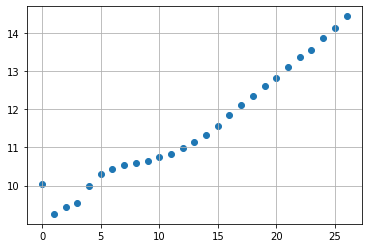

In [36]:
x = np.linspace(0,26,len(data))

plt.figure()
plt.scatter(x, data)
plt.grid()

In [43]:
def funcion_de_costo(beta, X, y, size):
    beta = np.reshape(beta, [size, -1])
    pred = X @ beta
    costo = (y - pred).T @ (y-pred)
    return costo [0][0]

# Matriz X 
ones = np.ones([len(data),1])

x_1 =np.reshape(x, [len(data), -1])
x_2 = np.reshape(x**2,[len(data), -1])
x_3 = np.reshape(x**3,[len(data), -1])

x1 = np.hstack((ones, x_1))
x2 = np.hstack((ones, x_1, x_2))
x3 = np.hstack((ones, x_1, x_2, x_3))

# Beta
beta_inicial_1 = np.random.rand(2)
beta_inicial_2 = np.random.rand(3)
beta_inicial_3 = np.random.rand(4)

y = np.reshape(data, [len(data), -1])

In [45]:
print("Grado 1: ", funcion_de_costo(beta_inicial_1, x1, y, 2))
print("Grado 2: ", funcion_de_costo(beta_inicial_2, x2, y, 3))
print("Grado 3: ", funcion_de_costo(beta_inicial_3, x3, y, 4))

Grado 1:  574.8144362638454
Grado 2:  998811.759833757
Grado 3:  11573229.217711534


In [47]:
sol1 = opt.minimize(funcion_de_costo, beta_inicial_1, args = (x1, y, 2))
sol1

      fun: 2.370488951817527
 hess_inv: array([[ 0.07010583, -0.00396825],
       [-0.00396825,  0.00030525]])
      jac: array([4.73856926e-06, 5.00679016e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([9.11567664, 0.18667054])

In [49]:
sol2 = opt.minimize(funcion_de_costo, beta_inicial_2, args = (x2, y, 3))
sol2

      fun: 0.8443845175948685
 hess_inv: array([[ 1.44240179e-01, -2.17591872e-02,  6.84214706e-04],
       [-2.17591872e-02,  4.57487974e-03, -1.64208978e-04],
       [ 6.84214706e-04, -1.64208978e-04,  6.31557690e-06]])
      jac: array([0.00032651, 0.00458233, 0.09914063])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 199
      nit: 9
     njev: 47
   status: 2
  success: False
        x: array([9.59130167e+00, 7.25217065e-02, 4.39034430e-03])

In [51]:
sol3 = opt.minimize(funcion_de_costo, beta_inicial_3, args = (x3, y, 4))
sol3

      fun: 0.8404346755224521
 hess_inv: array([[ 2.27239559e-01, -6.41154298e-02,  4.83488418e-03,
        -1.06428268e-04],
       [-6.41154298e-02,  2.61882152e-02, -2.28212613e-03,
         5.43057056e-05],
       [ 4.83488418e-03, -2.28212613e-03,  2.13850645e-04,
        -5.32141336e-06],
       [-1.06428268e-04,  5.43057056e-05, -5.32141336e-06,
         1.36446496e-07]])
      jac: array([-5.36441803e-07, -7.00354576e-07,  1.19209290e-07, -1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([9.56752291e+00, 8.46495990e-02, 3.20207345e-03, 3.04659875e-05])

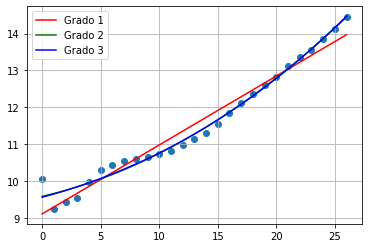

In [53]:
y_pred_1 = 9.115676 + 0.186670 * x
y_pred_2 = 9.59130167e+00 + 7.25217065e-02*x +  4.39034430e-03 * x**2
y_pred_3 = 9.56752291e+00 + 8.46495990e-02*x + 3.20207345e-03 * x**2 +  + 3.04659875e-05* x**3

plt.figure()
plt.scatter(x,data)
plt.plot(x, y_pred_1, "r", label = "Grado 1")
plt.plot(x, y_pred_2, "g", label = "Grado 2")
plt.plot(x, y_pred_3, "b", label = "Grado 3")
plt.legend()
plt.grid()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---